<h1 style="color:rgb(0,120,170)">344.038, KV Multimedia Search and Retrieval (WS2023/24)</h1>
<h2 style="color:rgb(0,120,170)">Task 2_Group B</h2>

| First Name | Family Name  | Matr.Nr   |
|:-----------|:-------------|:----------|
| Harald     | Eibensteiner | K01300179 |
| Hadi       | Sanaei       | K11733444 |
| Lukas      | Troyer       | K12006666 |
| Lukas      | Wagner       | K01357626 |
| Branko     | Paunović     | K12046370 |

### Load Data & Imports

In [1]:
%load_ext autoreload
%autoreload 2

from song import songs
from datasets import datasets
from retrieval import Retrieval

### Retrieve top N similar tracks

In [2]:
# Number of similar songs to retrieve
num_top_similar = int(input("Enter the number of top similar tracks: "))

# Example:
#   - Title: Letterman
#   - Artist: Wiz Khalifa
query, query_row_id = songs.prompt_song_query()

### Audio-based(similarity, MFCC)

In [3]:
# Sample query ID:  GDGURAgKxNPEuXzM
ret10 = Retrieval(n=10)
ret10.top_similar_tracks(query_row_id, dataset=datasets.mfcc_bow)

,id,similarity,song,artist
0,QbrBgVgAfI75hR3y,0.938748,Soulja's Story,2Pac
1,aqGzvg198LcJo0f6,0.938123,Whisper,VIXX LR
2,ost5WwHhojQYkCoV,0.935841,Best 4 U,Maroon 5
3,15hcBfdPhrtLVay2,0.934217,DNA,BTS
4,iHRt8u88DH1Dq7SP,0.933773,Loyal,Chris Brown
5,JCoVLNWgRrFWoVo5,0.933475,SHALL WE DANCE,Block B
6,GtDftmP0Fq5ueCh0,0.931576,Les Champs-Elysées,Joe Dassin
7,c7MBpdUlwywl4pLd,0.929431,EveryGirl In The World,Young Money
8,i9VU3HjsLHEVcM3T,0.929228,Starlight (Radio Edit),The Supermen Lovers
9,h2b5Pi6kMqyAK83G,0.928990,Look Into My Eyes,Bone Thugs-N-Harmony


### Audio-based(similarity, BLFs)

In [4]:
ret10.top_similar_tracks(query_row_id, dataset=datasets.blf_correlation)

,id,similarity,song,artist
0,qysJrLPfxSCkdg9o,0.880926,The Ponytail Parades,Emery
1,anGHLhCNm6LMQyJS,0.878762,BMT,Fredo
2,p2czBnPgwV4RdaAc,0.877702,Maria,Justin Bieber
3,jWoPLkSAzoccD2TE,0.877402,Lady Luck,Jamie Woon
4,ScRZH4xaA6xfixkz,0.875497,Everything's Good (Good Ass Outro),Chance the Rapper
5,I4BXiPdZKgHy8TQR,0.874424,Sorry - Latino Remix,Justin Bieber
6,2XJdZugpTcct6ziR,0.873334,The Voice,The Alan Parsons Project
7,LcpU4qRJ5zx7vgkJ,0.873138,400 Years,Bob Marley & The Wailers
8,knCRp64TFxWO7HWZ,0.872573,Yoncé,Beyoncé
9,31EmF9DBMyMEuSPe,0.871946,Ghosts 'n' Stuff,deadmau5


### Audio-based(similarity, i-vectors)

In [5]:
ret10.top_similar_tracks(query_row_id, dataset=datasets.ivec256)

,id,similarity,song,artist
0,hwXJRpxgXr0RfpyV,0.435942,Want To,Dua Lipa
1,9CuEQRYVaaGpgOGn,0.418616,Been On,G-Eazy
2,RRZEwA4gez2F70f7,0.403286,Living In Me,Omnium Gatherum
3,gVIMO5EjGXxMJKYx,0.394120,Live For Today,Escape the Fate
4,8P1uWIfvVC9g2Qbs,0.391232,"Work Hard, Play Hard",Wiz Khalifa
5,M6sUWCSbEbPcj8vv,0.390205,Both Of Em,Bhad Bhabie
6,ELY2iJ98YMasAAW1,0.384316,Colder,Charon
7,diZ46ID9N9bB0snk,0.382456,Perplexing Pegasus,Rae Sremmurd
8,ONXmdDPj3jxzHhj0,0.381409,SHOTGUN LOVE,Pia Mia
9,jWoPLkSAzoccD2TE,0.381253,Lady Luck,Jamie Woon


### Audio-based(similarity, musicnn)

In [6]:
ret10.top_similar_tracks(query_row_id, dataset=datasets.musicnn)

,id,similarity,song,artist
0,Lfz6ZdxizZyKdGzS,0.992988,Rabetania,Mc Wm
1,ZuTWXlJ8W1S89gJP,0.992582,134340,BTS
2,c7MBpdUlwywl4pLd,0.989887,EveryGirl In The World,Young Money
3,99DS3Upn48otRsML,0.989542,All I Need Is You,Lecrae
4,P8qxHDSBDJzT6NwC,0.988604,1999 WILDFIRE,BROCKHAMPTON
5,9CuEQRYVaaGpgOGn,0.988148,Been On,G-Eazy
6,2IZjV6srFH5YXkFr,0.987323,Was du Liebe nennst,Bausa
7,8P1uWIfvVC9g2Qbs,0.987178,"Work Hard, Play Hard",Wiz Khalifa
8,oC08qysPGbkxkSsp,0.985756,Fenomeno,Fabri Fibra
9,0RswMLgk4KS4GbIP,0.985695,Zack and Codeine,Post Malone


### Evaluation

In [7]:
from genres import Genres
genres = Genres()

  --> Loading pickled data from pickled_state/precomputed_genres.pickle


In [8]:
from precision_recall import PrecisionRecall
pr = PrecisionRecall(genres)
pr.compute()

Calculating precision and recall for random_baseline
  --> Loading pickled data from pickled_state/precision_recall_random_baseline.pickle
Calculating precision and recall for text_tf_idf
  --> No pickled data file found. Performing on-the-fly data computation and saving to 'pickled_state/precision_recall_text_tf_idf.pickle' for later (re-)use.


Calculating precision recall: text_tf_idf:   0%|          | 0/10094 [00:00<?, ?it/s]

Calculating precision and recall for text_bert
  --> No pickled data file found. Performing on-the-fly data computation and saving to 'pickled_state/precision_recall_text_bert.pickle' for later (re-)use.


Calculating precision recall: text_bert:   0%|          | 0/10094 [00:00<?, ?it/s]

Calculating precision and recall for text_word2vec
  --> No pickled data file found. Performing on-the-fly data computation and saving to 'pickled_state/precision_recall_text_word2vec.pickle' for later (re-)use.


Calculating precision recall: text_word2vec:   0%|          | 0/10094 [00:00<?, ?it/s]

Calculating precision and recall for mfcc_bow
  --> No pickled data file found. Performing on-the-fly data computation and saving to 'pickled_state/precision_recall_mfcc_bow.pickle' for later (re-)use.


Calculating precision recall: mfcc_bow:   0%|          | 0/10094 [00:00<?, ?it/s]

Calculating precision and recall for blf_correlation
  --> No pickled data file found. Performing on-the-fly data computation and saving to 'pickled_state/precision_recall_blf_correlation.pickle' for later (re-)use.


Calculating precision recall: blf_correlation:   0%|          | 0/10094 [00:00<?, ?it/s]

Calculating precision and recall for ivec256
  --> No pickled data file found. Performing on-the-fly data computation and saving to 'pickled_state/precision_recall_ivec256.pickle' for later (re-)use.


Calculating precision recall: ivec256:   0%|          | 0/10094 [00:00<?, ?it/s]

Calculating precision and recall for musicnn
  --> No pickled data file found. Performing on-the-fly data computation and saving to 'pickled_state/precision_recall_musicnn.pickle' for later (re-)use.


Calculating precision recall: musicnn:   0%|          | 0/10094 [00:00<?, ?it/s]

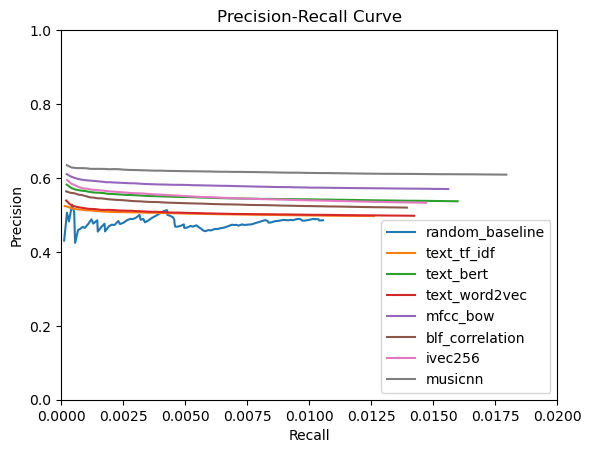

In [9]:
pr.plot()

Prepared 11 chunks to compute nDCG


Computing nDCG in chunks of 1000:   0%|          | 0/11 [00:00<?, ?it/s]

  --> No pickled data file found. Performing on-the-fly data computation and saving to 'pickled_state/ndcg_10_chunk_0.pickle' for later (re-)use.
  --> No pickled data file found. Performing on-the-fly data computation and saving to 'pickled_state/ndcg_10_chunk_1.pickle' for later (re-)use.
  --> No pickled data file found. Performing on-the-fly data computation and saving to 'pickled_state/ndcg_10_chunk_2.pickle' for later (re-)use.
  --> No pickled data file found. Performing on-the-fly data computation and saving to 'pickled_state/ndcg_10_chunk_3.pickle' for later (re-)use.
  --> No pickled data file found. Performing on-the-fly data computation and saving to 'pickled_state/ndcg_10_chunk_4.pickle' for later (re-)use.
  --> No pickled data file found. Performing on-the-fly data computation and saving to 'pickled_state/ndcg_10_chunk_5.pickle' for later (re-)use.
  --> No pickled data file found. Performing on-the-fly data computation and saving to 'pickled_state/ndcg_10_chunk_6.pickle

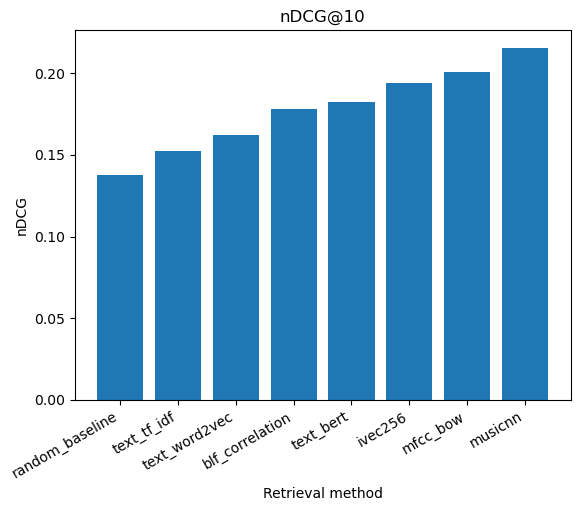

In [10]:
from ndcg import Ndcg

ndcg = Ndcg(genres)
ndcg.plot()